# People's Archive of Rural India (PARI) Coverage Visualization

![Geomapping PARI Coverage](download.png)

* PARI's articles, faces, albums and images is from rural India. We want to see how much of rural India has PARI covered?
* Specifically, which districts of the country have NOT been covered? 
* Is there geographical pattern to our coverage, is there a geographical pattern to our misses?
* Is there a geographical pattern to the Water Crisis, covered extensively by PARI?

To do this we need to map our coverage on a map of India. But we have a problem. The names of location in our database and the names of location in the map from the lovely folks at Datameet have spelling differences. There is therefore a key mismatch in many cases and a lot of important locations are dropped.


## The Transliteration Problem
At PARI we have articles from thousands of locations. Location names in India is a peculiar phenomenon. Here are a few issues that one sees with a location database:

* Indian names are transliterated in a diverse way by people. This is particularly true for Roman transliteration. Although there are international standards for transliteration. Most folks apply the Sir Roger Dowler technique -- Siraj ud Daulah -- that is transliterate by ear. The problem is that a number of Phd theses pervade the space between a Marathi ear and a Punjabi tongue. I mean, each Indian linguistic group has their own perception of what lettes in the English alphabet sound like.

    Odia tongue says Buldhana, the Punjabi ear hears Buldana. The Malayalali tongue says Pathanamtitta, the Malaylayali ear hears Pattanamtitta

    Yours truly has transliterated both with his right Marathi and left Konkani ear. So I don't exactly know what they said. Rest assured Buldhana is in Maharashtra and what I say matters. But then people from Buldhana might disagree. They do. 

    And then of course, a number of Bengali tongues scream and shout on whether it is Nilgiris or The Nilgiris (but then that is not a transliteration problem. Or is it? Let's not get into a debate on that. Not with the Bengalis at any rate)


* In addition to Phd theses, between the Punjabi tongue and the Marathi ear also stands the ubiquitous and all powerful Indian bureaucracy. Bureaucrats, as has been shown by paleontologists, are also anatomically, modern homo sapiens. And hence must have their have their own cultural-linuistic backgrounds. Every major institution also has its own cupboards, look-up tables, lexicons, ready reckoners, dialects, jargon and argots. Joke. 

    Suffice to say that the Census of India calls Darjeeling what the Election Commission calls Darjiling. The Meterological Department calls Purulia when the Ministry of Human Resources Development calls Puruliya. It is another matter that the HRD ministry might soon be called Department of Education. I digress.

    Allahabad becomes Prayagraj. Gurgaon becomes Gurugram. 

* And then there is the problem of taxonomy. Places migrate from districts to other districts. They graduate from a mere district to a full-blown division. Gerrymandering. Redistricting. All that good stuff.

* Besides millions of small hamlets where Dalits and Adivasis live are not recorded at all. They are dismissed as settlements of ostracized communities. How does one spell their names?

## Fusion of Tables

If the schwa-conscious Survey of India calls a place Chamarajanagar in the district map of India but the entomologically inclined and etymologically insensitive Department of Horticulture calls it Chamrajnagar, then --the district that was once a part of the larger Mysore district and was formerly called "Sri Arikottara"-- has no chance of appearing on the map of gardens in India. Esepcially if the map is drafted by a machine or a careless cartographer.


# Connecting to PARI Postgres DB

In [1]:
import pandas as pd
import pandas.io.sql as sqlio
import psycopg2
from gender_detector import gender_detector as gd

def getData(file):
    with open (file, 'r') as myfile:
        data = myfile.read()
        return data
    
def getDf():
    try:
        cred = getData('../credentials.txt')
        conn =psycopg2.connect(cred)
        sql = getData('../query.txt')
        df = sqlio.read_sql_query(sql, conn)

    except (Exception, psycopg2.Error) as error :
        print ("Error while connecting to PostgreSQL", error)
    finally:
        #closing database connection.
        if(conn):
            conn.close()
#                 print("PostgreSQL connection is closed")
        return df

In [2]:
df = getDf()
df

,id,name,slug,st_x,st_y,district,state,region,panchayat,sub_district_type_id,sub_district_name
0,969,Maem,969-maem,15.568798,73.924225,North Goa,Goa,,,3.0,Bicholim
1,571,Mohanpur,571-mohanpur,22.767428,88.388345,North 24 Parganas,West Bengal,None,None,1.0,Barrackpore
2,568,Sana Hill Top,568-sana-hill-top,27.059356,88.469454,Kalimpong,West Bengal,None,None,NaN,None
3,593,Simayel,593-simayel,29.446408,79.559641,Nainital,Uttarakhand,None,None,4.0,Ramgarh
4,47,Sundergarh,47-sundergarh,22.120000,84.030000,Sundargarh,Odisha,None,None,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...
1899,1970,Teliarsala,1970-teliarsala,21.888042,85.586061,Kendujhar,Odisha,,,1.0,Jhumpura
1900,1976,Balipasi,1976-balipasi,21.589232,85.668784,Kendujhar,Odisha,,,1.0,Saharapada
1901,1981,Phanaphana,1981-phanaphana,19.984913,86.017066,Puri,Odisha,,,1.0,Gop
1902,1990,Rajkot,1990-rajkot,22.305199,70.802834,Rajkot,Gujarat,,,NaN,


Number of Districts that PARI has been to

In [3]:
print(df.district.unique().size)

434


Save this table to a CSV file for future reference

In [4]:
csv_file = "district_pari.csv"
df.to_csv(csv_file)

# Now let's plot color these districts on the District Map of India

In [5]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [6]:
%matplotlib inline

In [7]:
plt.rcParams['figure.figsize'] = (20, 10)


In [8]:
geo_data = gpd.read_file('india_district.geojson')

# Perhaps due to the redistricting and change in statehood of the former state of J&K, the district map of the state is not correct.

This district map has been obtained due to the good work of Geohacker https://github.com/geohacker/india/blob/master/district/india_district.geojson

It DOES NOT REPRESENT the factual political boundaries of Republic of India.

I would be happy to change this geojson file with a more representative and legally accurate district map of India. It was very difficult to find one. For this experiment I felt this should suffice. 

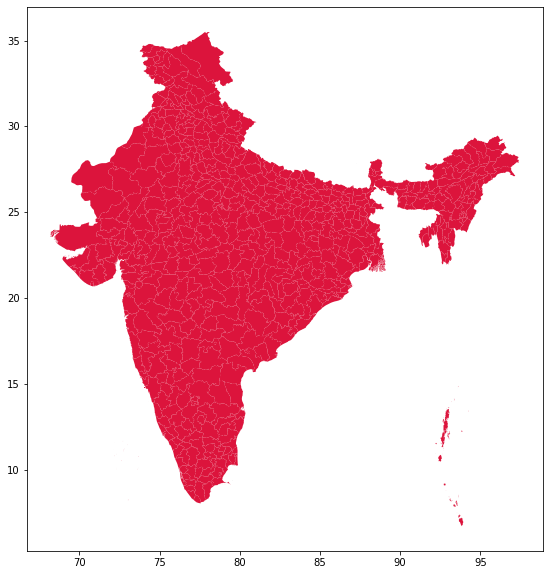

In [9]:
ax = geo_data.plot(color='crimson')

In [10]:
geo_data

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,NL_NAME_2,VARNAME_2,TYPE_2,ENGTYPE_2,geometry
0,105,IND,India,1,Andaman and Nicobar,1,Andaman Islands,None,None,District,District,"MULTIPOLYGON (((92.51583 10.89764, 92.51611 10..."
1,105,IND,India,1,Andaman and Nicobar,2,Nicobar Islands,None,None,District,District,"MULTIPOLYGON (((93.78773 6.85264, 93.78849 6.8..."
2,105,IND,India,2,Andhra Pradesh,3,Adilabad,None,None,District,District,"POLYGON ((78.33625 19.88319, 78.34669 19.88140..."
3,105,IND,India,2,Andhra Pradesh,4,Anantapur,None,"Anantpur, Ananthapur",District,District,"POLYGON ((77.69000 15.17628, 77.69378 15.17347..."
4,105,IND,India,2,Andhra Pradesh,5,Chittoor,None,Chitoor|Chittor,District,District,"POLYGON ((78.47611 13.93680, 78.48208 13.93007..."
...,...,...,...,...,...,...,...,...,...,...,...,...
589,105,IND,India,35,West Bengal,590,North 24 Parganas,None,None,District,District,"MULTIPOLYGON (((88.83472 21.60722, 88.83500 21..."
590,105,IND,India,35,West Bengal,591,Puruliya,None,None,District,District,"POLYGON ((86.89407 23.63799, 86.88847 23.62729..."
591,105,IND,India,35,West Bengal,592,South 24 Parganas,None,None,District,District,"MULTIPOLYGON (((88.01861 21.57278, 88.01889 21..."
592,105,IND,India,35,West Bengal,593,Uttar Dinajpur,None,None,District,District,"MULTIPOLYGON (((88.45847 25.59628, 88.45979 25..."


In [11]:
import pandas as pd
import os

### I agree this seems like a useless step but I do this to avoid constant querying of the database. Instead I cache the query on a local readable csv file.

In [12]:
data = pd.read_csv(csv_file, index_col=0, header=0)

In [13]:
data.district.unique().size

434

This plot is obviously inadequate. It has missed many districts due to the mismatch of the district name string between the map and the database resultset.

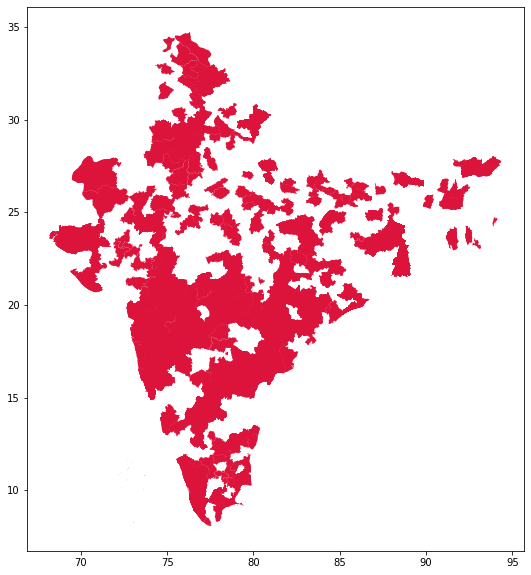

In [14]:
df_inner = pd.merge(geo_data, data, right_on='district', left_on='NAME_2', how='inner')
ax = df_inner.plot(color='crimson')

## The number of districts in the query result set  that found a match on the district map

In [15]:
unfuzzy = df_inner.district.unique().size
print(unfuzzy)

268


This is the number of districts that PARI covered but could not find a corresponding district polygon in the gejson file. This could be due to various reasons -- one prominent reason being transliteration issues described above. Other reasons could be:
* change in name of the district. 
* The district does not exist anymore

In [16]:
df_outer = pd.merge(data, geo_data, left_on='district', right_on='NAME_2', how='outer')
misspelt = df_outer[df_outer['geometry'].isnull()]
misspelt.district.unique().size

166

## We first try out a library called Soundex. It can be used to identify homophones

In [17]:
from libindic.soundex import Soundex
soundex = Soundex()
soundex.soundex(u"कारटा")
soundex.soundex(u"कार्टा")

print(soundex.soundex(u"Darjeeling"))
print(soundex.soundex(u"Durjalink"))
# soundex.compare(u"कारटा", u"कार्टा")
# soundex.compare(u"Darjeeling", u"Darjiling")

# for x, y in misspelt.iterrows():
#         print(y["district"], soundex.soundex(y["district"]))

D62452
D62452


## This is how the Geojson file looks in Geopandas

In [18]:
geo_data

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,NL_NAME_2,VARNAME_2,TYPE_2,ENGTYPE_2,geometry
0,105,IND,India,1,Andaman and Nicobar,1,Andaman Islands,None,None,District,District,"MULTIPOLYGON (((92.51583 10.89764, 92.51611 10..."
1,105,IND,India,1,Andaman and Nicobar,2,Nicobar Islands,None,None,District,District,"MULTIPOLYGON (((93.78773 6.85264, 93.78849 6.8..."
2,105,IND,India,2,Andhra Pradesh,3,Adilabad,None,None,District,District,"POLYGON ((78.33625 19.88319, 78.34669 19.88140..."
3,105,IND,India,2,Andhra Pradesh,4,Anantapur,None,"Anantpur, Ananthapur",District,District,"POLYGON ((77.69000 15.17628, 77.69378 15.17347..."
4,105,IND,India,2,Andhra Pradesh,5,Chittoor,None,Chitoor|Chittor,District,District,"POLYGON ((78.47611 13.93680, 78.48208 13.93007..."
...,...,...,...,...,...,...,...,...,...,...,...,...
589,105,IND,India,35,West Bengal,590,North 24 Parganas,None,None,District,District,"MULTIPOLYGON (((88.83472 21.60722, 88.83500 21..."
590,105,IND,India,35,West Bengal,591,Puruliya,None,None,District,District,"POLYGON ((86.89407 23.63799, 86.88847 23.62729..."
591,105,IND,India,35,West Bengal,592,South 24 Parganas,None,None,District,District,"MULTIPOLYGON (((88.01861 21.57278, 88.01889 21..."
592,105,IND,India,35,West Bengal,593,Uttar Dinajpur,None,None,District,District,"MULTIPOLYGON (((88.45847 25.59628, 88.45979 25..."


## One automated way of matching a string like "Darjeeling" with "Darjiling" is by using edit distance algo called Levenshtein distance. A threshold of 0.8 seems to work okay.

In [19]:
import Levenshtein as lev
from fuzzywuzzy import fuzz
import csv
import codecs

dist_function = lambda x, y: (lev.ratio(x.lower(), y.lower()))
# dist_function = lambda x, y: (fuzz.partial_ratio(x, y), 80)
# dist_function = lambda x, y: (instance.compare(x, y))

matched = []
unmatched = []

district1 = []
district2 = []
state1 = []
state2 = []
distances = []
decisions = []

def fill_arrays(d1, d2, s1, s2, distance, decision):
    district1.append(d1)
    district2.append(d2)
    state1.append(s1)
    state2.append(s2)
    distances.append(distance)
    decisions.append(decision)
                

for x, y in misspelt.iterrows():
        max = 0
        bestmatch = ''
        stateOfbestMatch = ''
        for i, j in geo_data.iterrows(): 
            r = dist_function(y["district"], j["NAME_2"])
            rS = dist_function(y['state'], j['NAME_1'])
            if( r> 0.65 and rS > 0.8):
                max = r
                bestmatch = j["NAME_2"]
                stateOfbestMatch = j['NAME_1']
        if max != 0: 
            if(y["district"] not in matched):
                matched.append(y["district"])
                fill_arrays(y["district"], bestmatch, y["state"], stateOfbestMatch, max, "match") 
                
            data.loc[(data['district'] == y["district"]) & (data['state']==y['state']), ['district']] = bestmatch
        elif(y["district"] not in unmatched):
                unmatched.append(y["district"])
                fill_arrays(y["district"], bestmatch, y["state"], stateOfbestMatch, max, "no match")

fm_data = {'District 1': district1, 
        'District 2 ' : district2,
        'State 1' : state1,
        'State 2' : state2,
        'Distance' : distances,
        'Decision' : decisions
       } 
fm = pd.DataFrame(fm_data) 
                

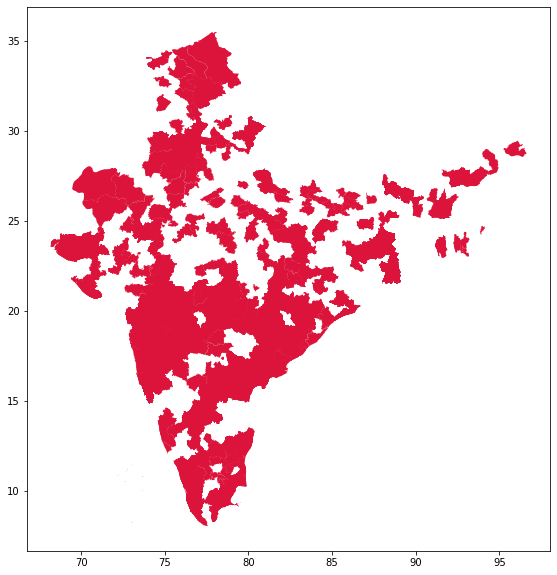

In [20]:
df_inner = pd.merge(geo_data, data, right_on='district', left_on='NAME_2', how='inner')
ax = df_inner.plot(color='crimson')

In [21]:
fuzzy = df_inner.district.unique().size

In [22]:
print(unfuzzy/fuzzy)

0.9084745762711864


In [23]:
fuzzy

295

In [24]:
df_outer = pd.merge(data, geo_data, left_on='district', right_on='NAME_2', how='outer')
df_outer[df_outer['geometry'].isnull()].district.unique().size

88

In [25]:
fm

,District 1,District 2,State 1,State 2,Distance,Decision
0,Kalimpong,,West Bengal,,0.000000,no match
1,Nainital,,Uttarakhand,,0.000000,no match
2,Kanchipuram,Kancheepuram,Tamil Nadu,Tamil Nadu,0.869565,match
3,Bardhaman,Barddhaman,West Bengal,West Bengal,0.947368,match
4,Howrah,Haora,West Bengal,West Bengal,0.666667,match
...,...,...,...,...,...,...
161,Ashok Nagar,Ashoknagar,Madhya Pradesh,Madhya Pradesh,0.952381,match
162,Reva,Rewa,Madhya Pradesh,Madhya Pradesh,0.750000,match
163,Mahisagar,Mahesana,Gujarat,Gujarat,0.705882,match
164,Kondagaon,,Chhattisgarh,,0.000000,no match


In [26]:
fm.to_csv('FuzzyMatches.csv')